# Assignment 0: OpenCV and Chroma Keying
### <br>Laksh Nanwani - 2021701002

---

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

__1. Video ↔ Images: Write a program to convert a given video to its constituent images. Your output should be in a specified folder. Write another program that will merge a set of images in a folder into a single video. You should be able to control the frame rate in the video that is created.__

This question focuses on converting video into images and combining images to form a video. The code fpr the same is available below. Since we were breaking a video into it's frames to get images, hence to save some space, I have added the parameters max_frame and frame_step to save some storage space. We are also combining images to form a video, which means we can also control the frames per second (fps), which will effect the length of the video being formed from the same number of images, and hence the speed of movement of objects in the video too (can be observed during experimentation). I didn't face any challenges as such for this problem.
<br> Experiments - changing the fps for images -> video, changing max frames and frame steps.

In [2]:
videos_dir = "videos/"
images_dir = "images/"

In [3]:
def videoToImages(video_path, images_dir, frame_step = 1, max_frame = 100, wait_time = 1, quit_key = 'q', printFrame = False):
    video = cv2.VideoCapture(video_path)
    frameCount = 0
    
    while(video.isOpened()):
        if max_frame >= 0 and frameCount > max_frame:
            break
        
        ret, frame = video.read()
        if ret == True:
            cv2.imshow('Frame',frame)
            
            if frameCount % frame_step == 0:
                if printFrame:
                    print("Capturing frame " + str(frameCount))
                cv2.imwrite((images_dir + str(frameCount) + '.jpg'), frame)
            
            frameCount += 1
            
            if cv2.waitKey(wait_time) & 0xFF == ord(quit_key):
                break
        else:
            break
            
    video.release()
    cv2.destroyAllWindows()

In [4]:
# using a pre-recorded video
videoToImages(videos_dir + "shrek.mp4", images_dir + "shrek/", 1, 200, 1, 'a')

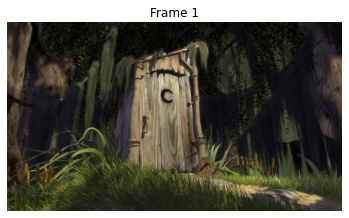

In [5]:
plt.imshow(cv2.cvtColor(cv2.imread(images_dir + "shrek/0.jpg"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Frame 1")
plt.show()

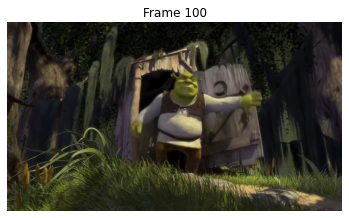

In [6]:
plt.imshow(cv2.cvtColor(cv2.imread(images_dir + "shrek/99.jpg"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Frame 100")
plt.show()

In [7]:
# videoToImages(videos_dir + "deadpool_green.mp4", images_dir + "deadpool/", 1, 5, 1, 'a')

In [8]:
def imagesToVideo(video_path, images_dir, fps):
    images = []
    img_names = (os.listdir(images_dir))
    img_names = sorted(img_names, key=lambda x: int(os.path.splitext(x)[0]))
    # print(img_names)
    
    for img_name in img_names:
        img = cv2.imread((images_dir + img_name))
        images.append(img)

    h, w = img.shape[0:2]

    out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'MJPG'), fps, (w, h))

    for img in images:
        out.write(img)
        
    out.release()

In [9]:
imagesToVideo(videos_dir + "shrek_reconstructed_10fps.mp4", images_dir + "shrek/", 10)

In [10]:
imagesToVideo(videos_dir + "shrek_reconstructed_30fps.mp4", images_dir + "shrek/", 30)

In [11]:
imagesToVideo(videos_dir + "shrek_reconstructed_60fps.mp4", images_dir + "shrek/", 60)

In [12]:
# cv2.destroyAllWindows()

---

__2. Capturing Images: Learn how to capture frames from a webcam connected to your computer and save them as
images in a folder. You may use either the built-in camera of your laptop or an external one connected through
USB. You should also be able to display the frames (the video) on the screen while capturing.__

This problem focuses on learning how to use the in built webcam (or extenal) and saving images from and displaying the live video. This can be easily done by replacing the video_path in the above function videoToImages by an integer (0 as I am using inbuilt webcam)

In [13]:
# using laptop webcam
videoToImages(0, images_dir + "webcam/", 1, 200, 1, 'a')

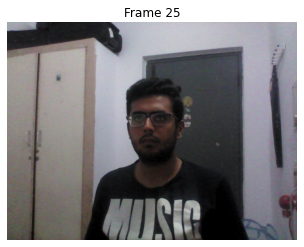

In [14]:
plt.imshow(cv2.cvtColor(cv2.imread(images_dir + "webcam/24.jpg"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Frame 25")
plt.show()

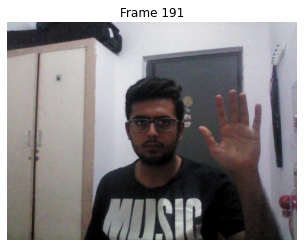

In [15]:
plt.imshow(cv2.cvtColor(cv2.imread(images_dir + "webcam/190.jpg"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Frame 191")
plt.show()

---

__3. Chroma Keying: Read about the technique of chroma keying. Following are a few good starting points:
<br> Introduction: http://en.wikipedia.org/wiki/Chromakey
<br> Alvy Ray Smith and James F Blinn, ”Blue Screen Matting”, SIGGRAPH’96.
<br>Create an interesting composite of two videos using this technique, possibly with one video including yourselves.__

This problem focuses on getting to know about the technique Chroma Keying and applying it using 2 videos. I couldn't use a video involving myelf as I wasn't able to arrange a good background which will be useful enough for the technique.
<br>Experimentation - Had to get the range of lower and upper green by repeating with different values, and also the dilation kernel and iterations. The results can be improved further by more experimentation.
<br>Challenge faced - Couldn't remove the green perfectly and it was a lot more visible before, hence I decided to use dilation on the mask (as it will increase white pixels and decrease black pixels)

In [16]:
def removeColorScreenAndMerge(bg_img, fg_img, low_color, high_color):
    assert bg_img.shape == fg_img.shape
#     mask = cv2.inRange(frame1, low_color, high_color)
#     mask = cv2.dilate(mask, np.ones((9,9)), 7)
#     residual = cv2.bitwise_and(frame1, frame1, mask = mask)
 
#     green_removed = frame1 - residual
#     merged = np.where(green_removed == 0, frame2, green_removed)

    mask = cv2.inRange(fg_img, low_color, high_color)
#     plt.imshow(mask, cmap='gray')
    mask = cv2.dilate(mask, np.ones((9,9)), 4)
    
    masked_bg_img = np.copy(bg_img)
    masked_bg_img[mask == 0] = [0, 0, 0]
#     plt.imshow(masked_bg_img)
    
    cropped_fg_img = np.copy(fg_img)
    cropped_fg_img[mask != 0] = [0, 0, 0]
    
    return (masked_bg_img + cropped_fg_img)
    
    return merged

In [17]:
vid1 = cv2.VideoCapture(videos_dir + "deadpool_green.mp4")
vid2 = cv2.VideoCapture(videos_dir + "aerial-view-of-people-walking.webm")

while True:
    ret1, frame1 = vid1.read()
    ret2, frame2 = vid2.read()
    
    if not ret1 or not ret2 or frame1 is None or frame2 is None:
        break
        
    h,w = frame1.shape[0:2]
    frame2 = cv2.resize(frame2, (w,h))

    merged = removeColorScreenAndMerge(frame2, frame1, np.array([0, 150, 0]), np.array([100, 255, 100]))

    cv2.imshow("Merged", merged)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
        
vid1.release()
vid2.release()
cv2.destroyAllWindows()

In [18]:
# cv2.destroyAllWindows()

In [22]:
videoToImages(videos_dir + "deadpool_green.mp4", images_dir + "deadpool/", 1, 50, 1, 'a')
videoToImages(videos_dir + "aerial-view-of-people-walking.webm", images_dir + "people/", 1, 50, 1, 'a')

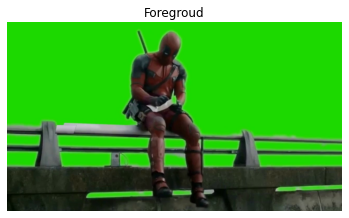

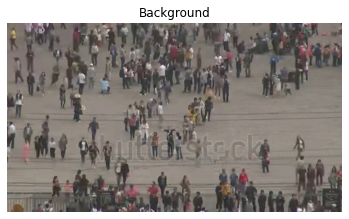

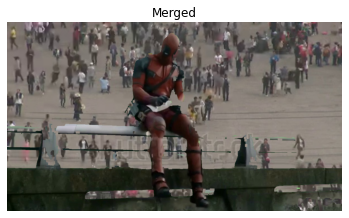

In [23]:
fg = cv2.cvtColor(cv2.imread(images_dir + "deadpool/5.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(fg)
plt.axis('off')
plt.title("Foregroud")
plt.show()

bg = cv2.cvtColor(cv2.imread(images_dir + "people/5.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(bg)
plt.axis('off')
plt.title("Background")
plt.show()

h,w = fg.shape[0:2]
bg = cv2.resize(bg, (w,h))
merged = removeColorScreenAndMerge(bg, fg, np.array([0, 100, 0]), np.array([100, 255, 100]))
plt.imshow(merged)
plt.axis('off')
plt.title("Merged")
plt.show()

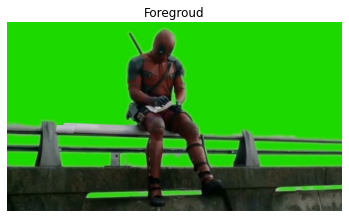

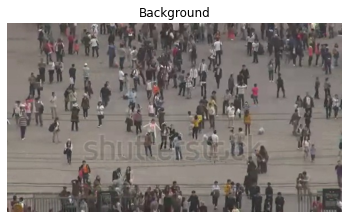

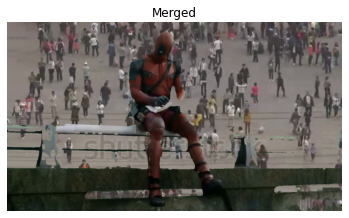

In [24]:
fg = cv2.cvtColor(cv2.imread(images_dir + "deadpool/49.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(fg)
plt.axis('off')
plt.title("Foregroud")
plt.show()

bg = cv2.cvtColor(cv2.imread(images_dir + "people/49.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(bg)
plt.axis('off')
plt.title("Background")
plt.show()

h,w = fg.shape[0:2]
bg = cv2.resize(bg, (w,h))
merged = removeColorScreenAndMerge(bg, fg, np.array([0, 100, 0]), np.array([100, 255, 100]))
plt.imshow(merged)
plt.axis('off')
plt.title("Merged")
plt.show()

---